In [5]:
import cv2
import numpy as np
import torch
import easyocr
%matplotlib inline
import matplotlib.pyplot as plt
import imutils
reader = easyocr.Reader(['en'])

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
licensePlateModel = torch.hub.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\yolov5', 'custom', path=r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\models\best_lp.pt', source='local').to(device)

YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 


In [8]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\42.jpg')

def get_plate(img):

    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
    bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
    xmin, ymin, xmax, ymax = bbox[0:4]
    img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	
    return img_license_plate

def GDS(arr):
    gds = []
    mean = np.mean(arr)
    std = np.std(arr)
    th=3
    p_max, p_min = mean+std, mean-std
    for i in range(th, len(arr)-th):
        if ((arr[i]<np.mean(arr[i-th:i]) and arr[i]>np.mean(arr[i:i+th])) or (arr[i]>np.mean(arr[i-th:i]) and arr[i]<np.mean(arr[i:i+th]))) and arr[i]<= p_max and arr[i]>=p_min:
            gds.append(i)
    return gds
def getHandelArea(arr):
    gds = [0,0]
    mean = np.mean(arr)
    std = np.std(arr)
    th = 1
    p_max, p_min = mean+std, mean-std

    for i in range(th, len(arr)-th):
        
        if  (arr[i-th]>arr[i] and arr[i+th]<arr[i]) and arr[i]<= p_max and arr[i]>=p_min:
            if gds[0]==0:
                gds[0] = i
            else:
                gds[1] = i
    return gds
def applySummFunctin(img, axis = 1):
    res = np.sum(img, axis = axis)    #  summ elements in columns
    return res


# def get_plate(img):
#     img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#     bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
#     bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
#     xmin, ymin, xmax, ymax = bbox[0:4]
#     img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	


#     sum_1 = applySummFunctin(img_license_plate, axis =1)
#     sum_0 = applySummFunctin(img_license_plate, axis =0)
#     gds1 = GDS(sum_1)
#     gds0 = GDS(sum_0)
#     sub = img_license_plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]
    
#     print(reader.readtext(img_license_plate))
#     return img_license_plate

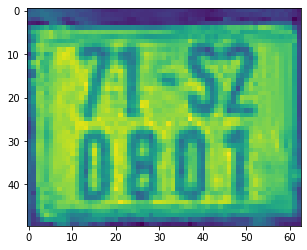

In [83]:
img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\42.jpg')

plt.imshow(get_plate(img))

In [86]:
i = 42
vehicle = cv2.imread('E:/IAMDAT/Workplace/DOANCUOIKY/ok/LisencePlateRecognition/sub_images/'+str(i)+'.jpg')
plate = get_plate(vehicle)
from sklearn.cluster import KMeans

# model = KMeans(n_clusters=2).fit(plate.reshape((-1,1)))
# plate = model.predict(plate.reshape((-1,1))).reshape(plate.shape)
# if model.cluster_centers_[0]>model.cluster_centers_[1]:
#     plate = 1-plate
# plt.imshow(plate,'gray')



In [87]:
reader.readtext(plate)


[([[6, 3], [57, 3], [57, 30], [6, 30]], '7152', 0.9739591859990898),
 ([[6, 24], [54, 24], [54, 48], [6, 48]], 'DBO1', 0.0934164896607399)]

In [88]:
sum_1 = applySummFunctin(plate, axis =1)
sum_0 = applySummFunctin(plate, axis =0)

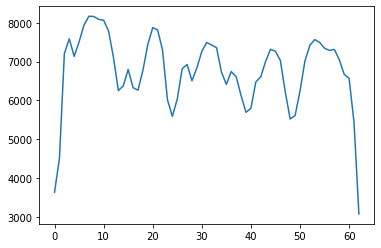

In [89]:
plt.plot(sum_0)

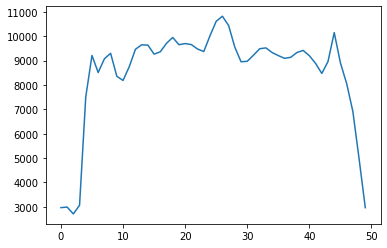

In [90]:
plt.plot(sum_1)

In [91]:
sum_1 = applySummFunctin(plate, axis =1)
sum_0 = applySummFunctin(plate, axis =0)
gds1 = GDS(sum_1)
gds0 = GDS(sum_0)
sub = plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]


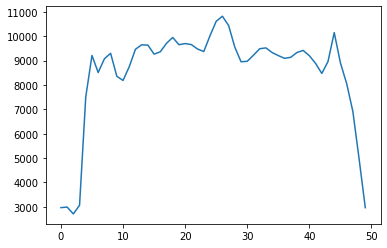

In [92]:
plt.plot(sum_1)

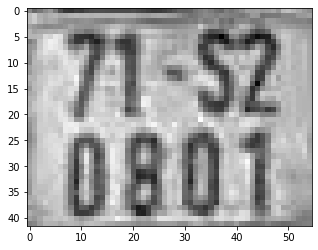

In [93]:
plt.imshow(sub, 'gray')

In [94]:
reader.readtext(plate)

[([[6, 3], [57, 3], [57, 30], [6, 30]], '7152', 0.9739591859990898),
 ([[6, 24], [54, 24], [54, 48], [6, 48]], 'DBO1', 0.0934164896607399)]

In [95]:
from sklearn.cluster import KMeans


def splitLine(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict

    s1 = applySummFunctin(img, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    line1 = predict[0:deadline,:]
    line2 = predict[deadline:-1,:]
    return line1, line2

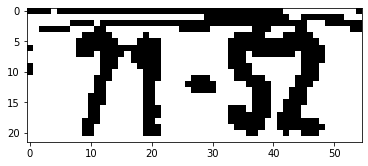

In [96]:
l1,l2 = splitLine(sub)
plt.imshow(l1,'gray')

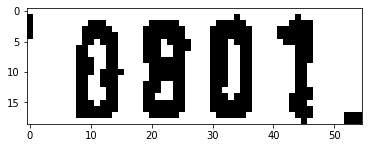

In [97]:
plt.imshow(l2,'gray')

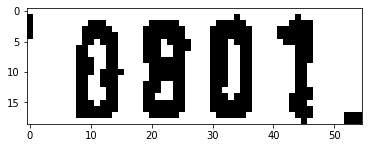

In [98]:
from sklearn.cluster import KMeans


model = KMeans(n_clusters=2).fit(l2.reshape((-1,1)))
binary = model.predict(l2.reshape(-1,1)).reshape(l2.shape)
if model.cluster_centers_[0]>model.cluster_centers_[1]:
    binary = 1-binary
plt.imshow(binary,'gray')


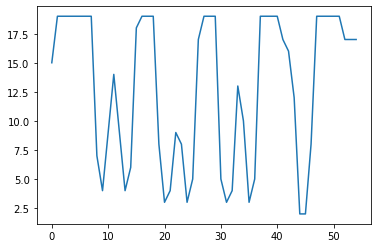

In [99]:
s0 = applySummFunctin(binary, axis =0)
plt.plot(s0)

In [100]:
def get_location_of_char(arr):
    locations = []
    lst = []
    max= np.max(arr)
    arr_tf =  arr>max-3
    print(arr_tf)
    for i in range(len(arr_tf)):
        if arr_tf[i]==False:
            lst.append(i)
        elif arr_tf[i]==True:
            if len(lst)<3:
                lst = []
            else:
                locations.append([lst[0], lst[-1]])
                lst = []

    return locations


In [101]:
gds = get_location_of_char(s0)
gds


[False  True  True  True  True  True  True  True False False False False False False False  True  True  True  True False False False False False False False  True  True  True  True False False False False False False False  True  True  True  True  True False False False False False  True  True  True  True  True  True
  True  True]


[[8, 14], [19, 25], [30, 36], [42, 46]]

In [62]:
chars = []
for i in gds:
    chars.append(l2[:,i[0]-1:i[1]+1]) 

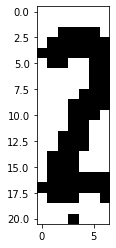

In [68]:
plt.imshow(chars[4],'gray')

In [129]:

from sklearn.cluster import KMeans
import cv2
import numpy as np
import torch

device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
licensePlateModel = torch.hub.load(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\yolov5', 'custom', path=r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\models\best_lp.pt', source='local').to(device)

img = cv2.imread(r'E:\IAMDAT\Workplace\DOANCUOIKY\ok\LisencePlateRecognition\sub_images\7.jpg')




def GDS(arr):
    gds = []
    mean = np.mean(arr)
    std = np.std(arr)
    th=3
    p_max, p_min = mean+std, mean-std
    for i in range(th, len(arr)-th):
        if ((arr[i]<np.mean(arr[i-th:i]) and arr[i]>np.mean(arr[i:i+th])) or (arr[i]>np.mean(arr[i-th:i]) and arr[i]<np.mean(arr[i:i+th]))) and arr[i]<= p_max and arr[i]>=p_min:
            gds.append(i)
    return gds

def applySummFunctin(img, axis = 1):
    res = np.sum(img, axis = axis)    #  summ elements in columns
    return res

def get_plate(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    bbox = licensePlateModel(img).pandas().xyxy[0].to_numpy()
    bbox = bbox[bbox[:,5]==max(bbox[:,5])][0]
    xmin, ymin, xmax, ymax = bbox[0:4]
    img_license_plate = img[int(ymin):int(ymax), int(xmin):int(xmax)]	
    return img_license_plate





def change_to_binary(img):
    kmeans = KMeans(n_clusters=2, random_state=0).fit(img.reshape((-1,1)))
    predict = kmeans.predict(img.reshape((-1,1))).reshape(img.shape)
    centers = kmeans.cluster_centers_
    if centers[0]>centers[1]:
        predict = 1-predict
    return predict

def splitLine(img):
    
    predict = change_to_binary(img)
    s1 = applySummFunctin(img, axis =1)
    lst_max = np.where(s1== max(s1))[0]
    deadline = lst_max[int(len(lst_max)/2)]
    line1_binary = predict[0:deadline,:]
    line2_binary = predict[deadline:-1,:]
    line1  = img[0:deadline,:]
    line2 = img[deadline:-1,:]
    return [line1, line2],[line1_binary, line2_binary]

def get_location_of_char(arr):
    locations = []
    lst = []
    max= np.max(arr)
    arr_tf =  arr>max-5
    print(arr_tf)
    for i in range(len(arr_tf)):
        if arr_tf[i]==False:
            lst.append(i)
        elif arr_tf[i]==True:
            if len(lst)<3:
                lst = []
            else:
                locations.append([lst[0], lst[-1]])
                lst = []

    return locations

def getCharInPlate(img):
    chars= []
    plate = get_plate(img)

    sum_1 = applySummFunctin(plate, axis =1)
    sum_0 = applySummFunctin(plate, axis =0)
    gds1 = GDS(sum_1)
    gds0 = GDS(sum_0)
    sub = plate[ gds1[0]:gds1[-1], gds0[0]:gds0[-1]]
    if (sub.shape[0]/sub.shape[1])>(1/3):
        lines, lines_b = splitLine(sub)
    else:
        lines, lines_b = [sub],[change_to_binary(sub)]
    
    for ind in range(len(lines)):
        s0 = applySummFunctin(lines_b[ind], axis =0)
        gds = get_location_of_char(s0)
        for i in gds:
            chars.append(lines[ind][:,i[0]-1:i[1]+1]) 
    return chars


YOLOv5  2022-3-15 torch 1.11.0+cu113 CUDA:0 (Quadro M500M, 2048MiB)

Fusing layers... 
Model Summary: 213 layers, 1760518 parameters, 0 gradients
Adding AutoShape... 


[False False  True  True  True  True  True  True  True False False False False False False False False  True False False False False False False False  True  True  True  True  True  True  True  True  True  True False False False False False False False False  True False False False False False False False  True  True
  True  True  True  True]
[False False  True False False False False False False  True  True  True  True  True  True False False False  True  True  True  True  True  True False False False False False False False  True  True  True  True  True  True False False False False False False False  True  True  True  True False False False False False
 False False  True  True]


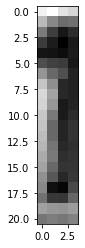

In [135]:
plt.imshow(getCharInPlate(img)[5],'gray')